In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("ad_10000records.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [11]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [12]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder
?OrdinalEncoder

In [116]:
oend = OrdinalEncoder()
df['Gender'] = oend.fit_transform(np.array(df["Gender"]).reshape(-1, 1))

Daily Time Spent on Site    0.091034
Age                         0.460383
Area Income                -0.067631
Daily Internet Usage       -0.129412
Gender                     -0.049596
Clicked on Ad               1.000000
Name: Clicked on Ad, dtype: float64


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked on Ad'],
      dtype='object')

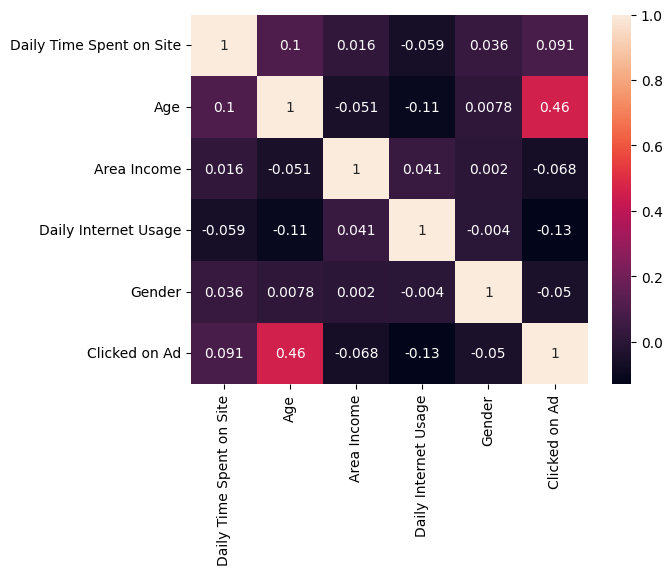

In [167]:
corr_mat = df.corr()
print(corr_mat['Clicked on Ad'])
sns.heatmap(corr_mat,annot = True)
corr_mat.columns.unique()

### As per the Heatmap, we aren't getting a strong correlation between any of the features, so we can also try creating boxplots to understand the correlation with a bit visual appeal

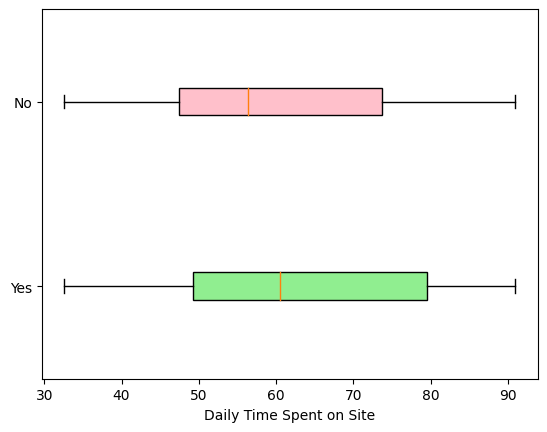

In [92]:
i = list(df.columns.unique())[0]
box = plt.boxplot([df[i].loc[df['Clicked on Ad'] == 1],df[i].loc[df['Clicked on Ad'] == 0]],vert=False,patch_artist= True,labels = ['Yes','No'])
color = ['lightgreen','pink']
plt.xlabel(i)
for patch,color in zip(box['boxes'],color):
    patch.set_facecolor(color)

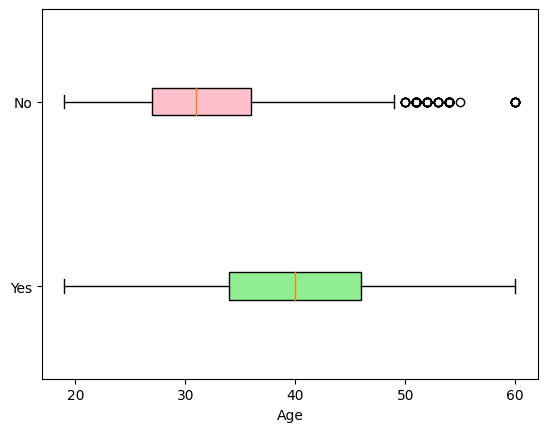

In [93]:

i = 'Age'
box = plt.boxplot([df[i].loc[df['Clicked on Ad'] == 1],df[i].loc[df['Clicked on Ad'] == 0]],vert=False,patch_artist= True,labels = ['Yes','No'])
color = ['lightgreen','pink']
plt.xlabel(i)
for patch,color in zip(box['boxes'],color):
    patch.set_facecolor(color)

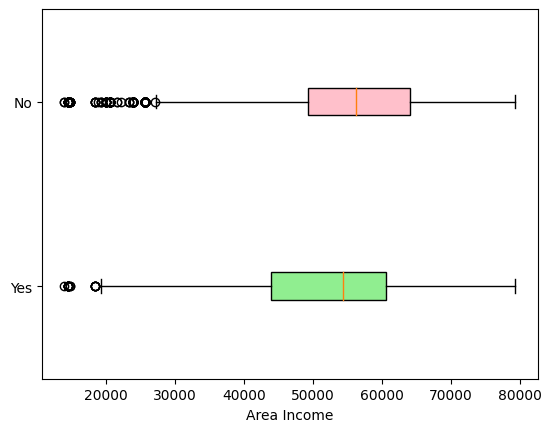

In [95]:
i = 'Area Income'
       
box = plt.boxplot([df[i].loc[df['Clicked on Ad'] == 1],df[i].loc[df['Clicked on Ad'] == 0]],vert=False,patch_artist= True,labels = ['Yes','No'])
color = ['lightgreen','pink']
plt.xlabel(i)
for patch,color in zip(box['boxes'],color):
    patch.set_facecolor(color)

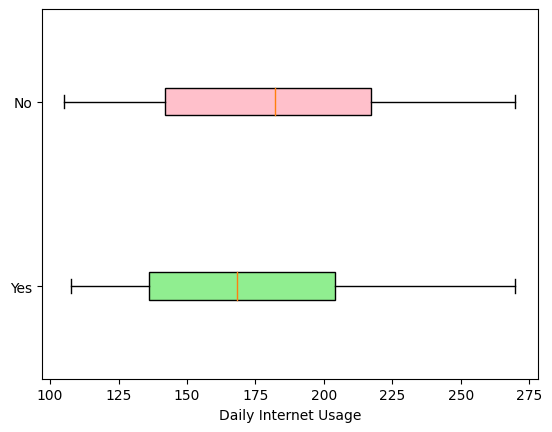

In [166]:
i = 'Daily Internet Usage'
box = plt.boxplot([df[i].loc[df['Clicked on Ad'] == 1],df[i].loc[df['Clicked on Ad'] == 0]],vert=False,patch_artist= True,labels = ['Yes','No'])
color = ['lightgreen','pink']
plt.xlabel(i)
for patch,color in zip(box['boxes'],color):
    patch.set_facecolor(color)

In [173]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
for i in list(corr_mat.columns.unique())[:-2]:
	df[i] = std.fit_transform(np.array(df[i]).reshape(-1,1))
    

In [174]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0.038160,-0.459619,1.172282,-0.120773,Decentralized real-time circuit,Lisafort,1.0,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,-1.269204,-0.576270,0.599579,0.720504,Optional full-range projection,West Angelabury,1.0,Singapore,2016-01-16 17:56:05,0
2,-1.099176,-0.692921,0.302562,-0.120773,Total 5thgeneration standardization,Reyesfurt,0.0,Guadeloupe,2016-06-29 10:50:45,0
3,-0.113400,-0.926224,0.175438,0.720504,Balanced empowering success,New Michael,0.0,Zambia,2016-06-21 14:32:32,0
4,-0.792872,-0.692921,0.036325,0.583557,Total 5thgeneration standardization,West Richard,0.0,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,-1.269204,-0.576270,0.599579,0.720504,Profound executive flexibility,West Angelabury,1.0,Singapore,2016-01-03 03:22:15,1
9996,-1.269204,-0.926224,-0.175272,-1.403022,Managed zero tolerance concept,Kennedyfurt,1.0,Luxembourg,2016-05-28 12:20:15,0
9997,-0.385953,0.356942,-1.182112,-1.306253,Intuitive exuding service-desk,North Randy,0.0,Egypt,2016-01-05 11:53:17,0
9998,-0.958442,1.640108,-0.739378,-1.338346,Realigned content-based leverage,North Samantha,0.0,Malawi,2016-04-04 07:07:46,1


### We will now split the dataset using stratified sampling

In [176]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,
    test_size=0.2,
    train_size=0.8,
    random_state=42)
#?StratifiedShuffleSplit
for i,j in split.split(np.zeros(len(df)),df["Clicked on Ad"]):
    strattrainindex = i
    strattestindex = j

In [177]:
xtrain = df.iloc[strattrainindex].iloc[:,:-1]
ytrain = df.iloc[strattrainindex].iloc[:,-1]
xtrain = xtrain.drop(columns = ['Ad Topic Line','City','Country','Timestamp'])

xtest =  df.iloc[strattestindex].iloc[:,:-1].drop(columns = ['Ad Topic Line','City','Country','Timestamp'])
ytest = df.iloc[strattestindex].iloc[:,-1]

### Will now use a set of ML algorithms to determine the best fit for our dataset

In [178]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [179]:
predicted_rate = lr.predict(xtrain)

from sklearn.metrics import mean_squared_error
mean_squared_error(ytrain,predicted_rate)

0.19361579177636012

#### Using the test set

In [180]:
predicted_test_rate = lr.predict(xtest)
mean_squared_error(ytest,predicted_test_rate)

0.1941591727448269

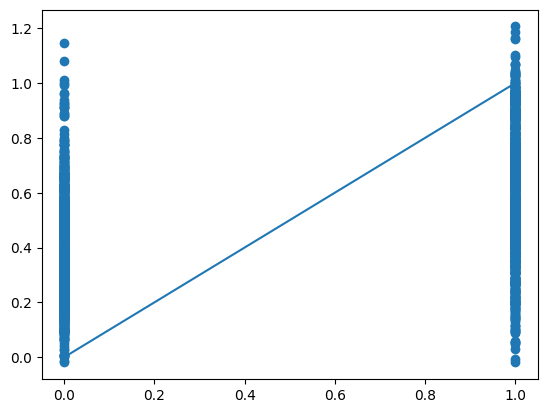

In [181]:
plt.scatter(ytest,predicted_test_rate)
plt.plot(ytest,ytest)

### Will try Decision Tree Regressor

In [182]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
predicted_dtr = dtr.predict(xtrain)
mean_squared_error(ytrain,predicted_dtr)

0.021712171855921857

#### Using test set

In [190]:
predicted_test_dtr = dtr.predict(xtest)
mean_squared_error(ytest,predicted_test_dtr)

0.25773991986434064

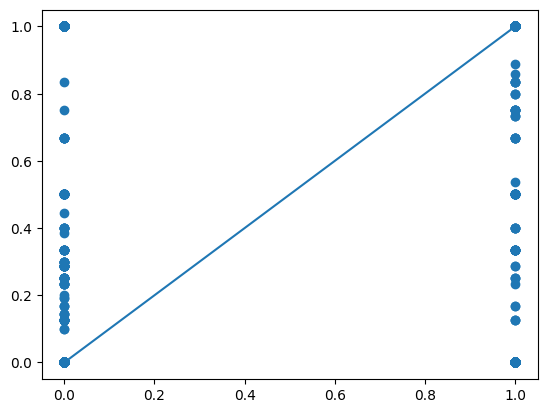

In [195]:
plt.scatter(ytest,predicted_test_dtr)
plt.plot(ytest,ytest)

### Will try ensemble learning method Random Forest algorithm

In [184]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)
predicted_rfr = rfr.predict(xtrain)
mean_squared_error(ytrain,predicted_rfr)

0.038125341553311515

#### Using Test Set

In [196]:
predicted_test_rfr = rfr.predict(xtest)
mean_squared_error(ytest,predicted_test_rfr)

0.15725887465658575

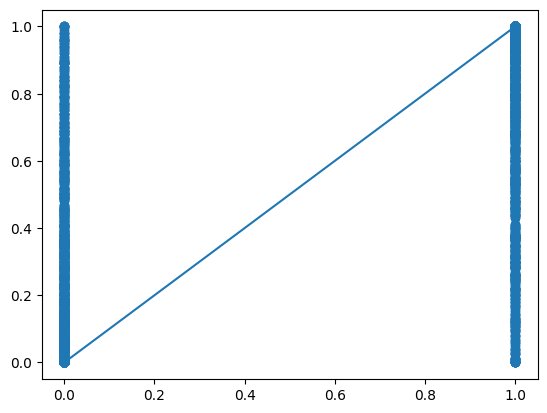

In [197]:
plt.scatter(ytest,predicted_test_rfr)
plt.plot(ytest,ytest)

### We can use **Cross-Validation (CV)** for robust evaluation of our model performance.

In [186]:
from sklearn.model_selection import cross_val_score


In [187]:
# First we will create a simple function to display scores of the applied algorithms

def display_scores(score):
    print("Scores :",score)
    print("Mean :",score.mean())
    print("Standard Deviation :",score.std())

In [188]:
# We can provide any estimator in the CVScore and find the best fit for our model, after trying all three,
# I found RandomForest to be the best fit

score = cross_val_score(rfr,xtrain,ytrain,scoring= 'neg_mean_squared_error',cv =10)
score = -score
display_scores(score)

Scores : [0.14899092 0.16931688 0.17066915 0.16708242 0.14524398 0.16600819
 0.15531709 0.16441401 0.15455105 0.16057462]
Mean : 0.16021683105048046
Standard Deviation : 0.008347444858978965


In [189]:
# Now let’s test the model by making predictions:


print("Ads Click Through Rate Prediction : ")

a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")
features = np.array([[a, b, c, d, e]])

print("Will the user click on ad = ", rfr.predict(features))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 60
Age: 25
Area Income: 46800
Daily Internet Usage: 120
Gender (Male = 1, Female = 0) : 1
Will the user click on ad =  [0.85]


C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
